## Librerias

In [6]:
# librerias
import pandas as pd
import matplotlib.pyplot as plt

## Cargar datos

In [2]:

# Cargar el archivo Excel
file_path = 'Caso-Practico-Bam-2023.xlsx'  

# Leer la hoja ejercicio 4
try:
    df = pd.read_excel(file_path, sheet_name='Ejercicio 7')
    print("Datos cargados correctamente.")
except Exception as e:
    print(f"Error al cargar el archivo: {e}")



Datos cargados correctamente.


In [3]:
df.head()

,Año,Mes,Cliente,Facturación,Tasa
0,2019,ene,100001,1221.0,0.065
1,2019,feb,100001,4070.0,0.065
2,2019,mar,100001,4983.0,0.065
3,2019,abr,100001,2176.0,0.065
4,2019,may,100001,4884.0,0.065


## Resolución

In [4]:
# Crear una columna de "Antes" o "Después"
df['Periodo'] = df.apply(
    lambda row: "Antes" if (row["Año"] == 2020 and row["Mes"] in ["ene", "feb", "mar", "abr", "may", "jun"]) or row["Año"] < 2020 else "Después", 
    axis=1
)

In [5]:
# Calcular promedio de facturación por cliente y periodo
promedios = df.groupby(['Cliente', 'Periodo'])['Facturación'].mean().unstack()
promedios['Cambio Porcentual'] = ((promedios['Después'] - promedios['Antes']) / promedios['Antes']) * 100
print(promedios)

Periodo        Antes      Después  Cambio Porcentual
Cliente                                             
100001   2841.666667  3327.750000          17.105572
200002   9746.166667  8080.333333         -17.092190
300003   5722.000000  6527.500000          14.077246


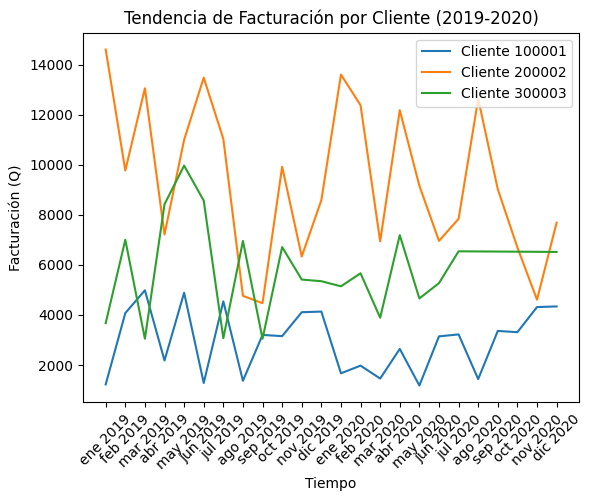

In [7]:
# Gráfico de línea para la tendencia de facturación
clientes = df['Cliente'].unique()
for cliente in clientes:
    cliente_data = df[df['Cliente'] == cliente]
    plt.plot(cliente_data['Mes'] + " " + cliente_data['Año'].astype(str), cliente_data['Facturación'], label=f"Cliente {cliente}")

plt.title("Tendencia de Facturación por Cliente (2019-2020)")
plt.xlabel("Tiempo")
plt.ylabel("Facturación (Q)")
plt.legend()
plt.xticks(rotation=45)
plt.show()


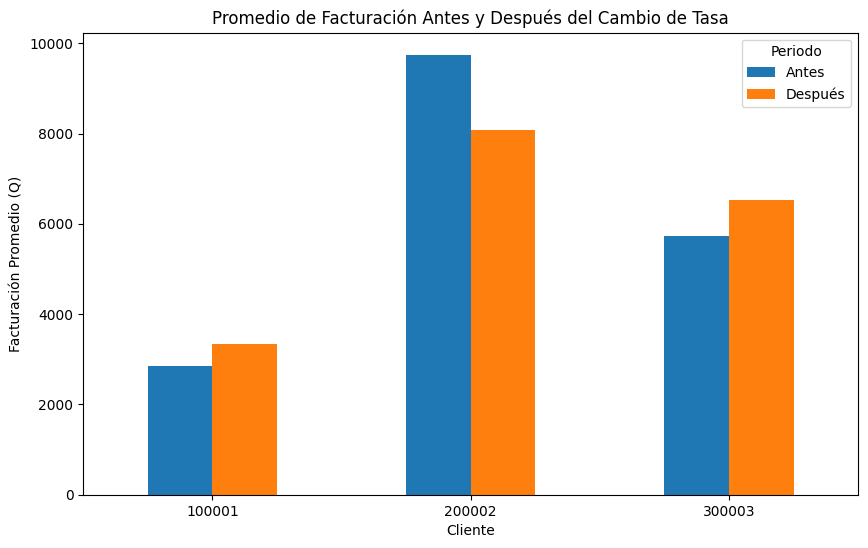

In [8]:
#  Gráfico de barras para comparación antes y después
promedios[['Antes', 'Después']].plot(kind='bar', figsize=(10, 6))
plt.title("Promedio de Facturación Antes y Después del Cambio de Tasa")
plt.ylabel("Facturación Promedio (Q)")
plt.xlabel("Cliente")
plt.xticks(rotation=0)
plt.show()
